In [1]:
import os

import cv2
import pyvips
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
data_dir = os.path.join("..", "data", "images")
image_names = os.listdir(data_dir)

print("num images:", len(image_names))

num images: 127


In [3]:
image_paths = [os.path.join(data_dir, i) for i in image_names]

images = [pyvips.Image.new_from_file(f, access="sequential") for f in image_paths]

In [4]:
smallest_image = images[image_names.index("11000.ome.tif")]

smallest_image = smallest_image.numpy()

height, width = smallest_image.shape[:2]

In [5]:
downsampled = cv2.resize(smallest_image, (width // 100, height // 100))

/var/folders/px/_hyh_81j2wx_d8kw_xzcl9hr0000gn/T/ipykernel_54789/2634299058.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


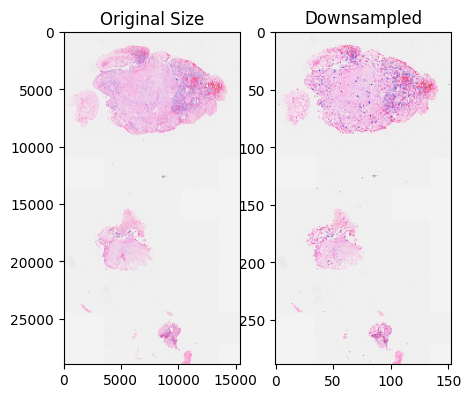

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

axes[0].imshow(smallest_image)
axes[0].set_title("Original Size")

axes[1].imshow(downsampled)
axes[1].set_title("Downsampled")

fig.show()

In [7]:
kernel_shape = (3, 3)

gray = cv2.cvtColor(downsampled, cv2.COLOR_RGB2GRAY)
_, background_mask = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)

_, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY_INV)
binary = cv2.GaussianBlur(binary, kernel_shape, 0)

kernel = np.ones(kernel_shape, np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=1)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [c * 100 for c in contours if cv2.contourArea(c) > 200]

/var/folders/px/_hyh_81j2wx_d8kw_xzcl9hr0000gn/T/ipykernel_54789/1002029850.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


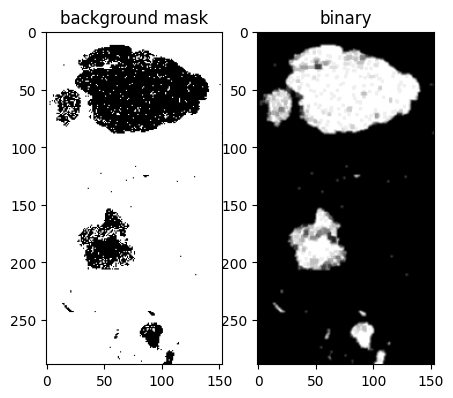

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

axes[0].imshow(background_mask, cmap="gray")
axes[0].set_title("background mask")

axes[1].imshow(binary, cmap="gray")
axes[1].set_title("binary")

fig.show()

In [9]:
average_background_color = downsampled[background_mask == 255].mean().astype("uint8")

average_background_color

np.uint8(240)

In [10]:
original_resolution = smallest_image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    original_resolution = cv2.rectangle(original_resolution, (x, y), (x + w, y + h), (0, 255, 0), 200)

contoured = cv2.drawContours(smallest_image, contours, -1, (0, 255, 0), 200)

/var/folders/px/_hyh_81j2wx_d8kw_xzcl9hr0000gn/T/ipykernel_54789/2896348488.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


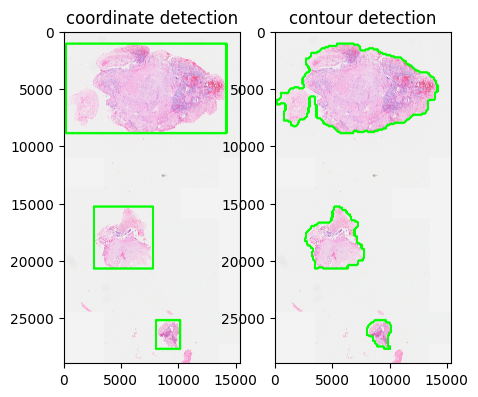

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

axes[0].imshow(original_resolution)
axes[0].set_title("coordinate detection")

axes[1].imshow(contoured)
axes[1].set_title("contour detection")

fig.show()

In [13]:
type(contours)

list

In [14]:
cv2.boundingRect(contour)

(200, 1100, 13901, 7801)

In [20]:
type(contour)

numpy.ndarray

In [ ]:


canvas = np.ones()
